<a href="https://colab.research.google.com/github/alimimam/Morfologi-Citra/blob/main/MUHAMMAD%20ALIM_Skeletonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

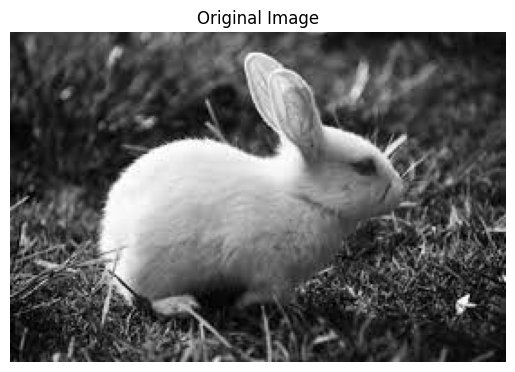

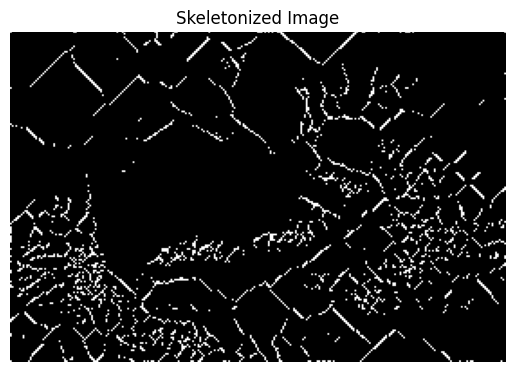

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read the image
image_path = "hewan.jpeg"  # Replace "your_image.jpg" with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image has been successfully loaded
if image is None:
    print("Error: Unable to load the image.")
else:
    # Binarize the image
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operation to get the skeleton
    size = np.size(binary_image)
    skel = np.zeros(binary_image.shape, np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    done = False

    while not done:
        eroded = cv2.erode(binary_image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary_image, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary_image = eroded.copy()

        zeros = size - cv2.countNonZero(binary_image)
        if zeros == size:
            done = True

    # Display the original image
    display_image(image, "Original Image")

    # Display the skeletonized image
    display_image(skel, "Skeletonized Image")